In [1]:
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import numpy as np
from deap import base, creator, tools, algorithms
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


In [3]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')


In [4]:
all_features = np.load('/Users/saikarthik/Desktop/scp/model_building/f.npy')
all_labels = np.load('/Users/saikarthik/Desktop/scp/model_building/l.npy')



In [5]:
all_features.shape

(6672, 53312)

In [6]:
all_labels.shape

(6672, 4)

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split( all_features, all_labels, test_size=0.2, random_state=42 )

In [8]:
num_classes=4


In [9]:
def evaluate_model(individual):
    num_layers = int(individual[0])  
    neurons_per_layer = individual[1]
    dropout_rate = individual[2]

    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(x_train.shape[1],)))

    for _ in range(num_layers):
        model.add(layers.Dense(neurons_per_layer, activation='relu'))
        model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0, callbacks=[early_stopping])

    _, accuracy = model.evaluate(x_test, y_test, verbose=0)
    
    return accuracy,  

In [10]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) 
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("num_layers", lambda: random.choice([2,4,8,16])) 
toolbox.register("neurons_per_layer", lambda: random.choice([128, 256, 512, 1024]))  
toolbox.register("dropout_rate", lambda: random.choice([0.2, 0.4])) 

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.num_layers, toolbox.neurons_per_layer, toolbox.dropout_rate), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_model)
toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutPolynomialBounded, low=[2, 128, 0.0], up=[16, 1024, 0.5], eta=1.0, indpb=0.2)

toolbox.register("select", tools.selTournament, tournsize=3)


In [11]:
population = toolbox.population(n=10) 
NGEN = 10 
CXPB, MUTPB = 0.5, 0.2 

best_accuracy = 0 
best_model = None 

for gen in range(NGEN):
    print(f"Generation {gen}")
    
    offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    population[:] = toolbox.select(offspring, len(population))

    best_ind = tools.selBest(population, 1)[0]
    current_accuracy = best_ind.fitness.values[0]

    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        num_layers = int(best_ind[0])
        neurons_per_layer = best_ind[1]
        dropout_rate = best_ind[2]

        best_model = models.Sequential()
        best_model.add(layers.InputLayer(input_shape=(x_train.shape[1],)))
        for _ in range(num_layers):
            best_model.add(layers.Dense(neurons_per_layer, activation='relu'))
            best_model.add(layers.Dropout(dropout_rate))

        best_model.add(layers.Dense(4, activation='softmax'))

        best_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(f"Best individual in generation {gen}: {best_ind}")
    print(f"Best fitness in generation {gen}: {best_ind.fitness.values[0]}")

print(f"Best individual after all generations: {best_ind}")
print(f"Best fitness after all generations: {best_ind.fitness.values[0]}")


Generation 0
Best individual in generation 0: [4, 512, 0.4]
Best fitness in generation 0: 0.9093632698059082
Generation 1
Best individual in generation 1: [8, 128, 0.2]
Best fitness in generation 1: 0.9176030158996582
Generation 2
Best individual in generation 2: [8, 128, 0.2]
Best fitness in generation 2: 0.9176030158996582
Generation 3
Best individual in generation 3: [8, 128, 0.2]
Best fitness in generation 3: 0.9176030158996582
Generation 4
Best individual in generation 4: [4, 512, 0.4]
Best fitness in generation 4: 0.9153558015823364
Generation 5
Best individual in generation 5: [4, 512, 0.4]
Best fitness in generation 5: 0.9235954880714417
Generation 6
Best individual in generation 6: [4, 512, 0.4]
Best fitness in generation 6: 0.9153558015823364
Generation 7
Best individual in generation 7: [4, 512, 0.4]
Best fitness in generation 7: 0.9101123809814453
Generation 8
Best individual in generation 8: [4, 512, 0.4]
Best fitness in generation 8: 0.9295880198478699
Generation 9
Best i

In [12]:
num_layers = int(round(best_ind[0]))  
neurons_per_layer = int(best_ind[1]) 
dropout_rate = best_ind[2]



print(f"Rounded Parameters: Layers = {num_layers}, Neurons per Layer = {neurons_per_layer}, Dropout Rate = {dropout_rate}")

model = models.Sequential()

model.add(layers.InputLayer(input_shape=(x_train.shape[1],)))  

for _ in range(num_layers):
    model.add(layers.Dense(neurons_per_layer, activation='relu'))
    model.add(layers.Dropout(dropout_rate))

model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Rounded Parameters: Layers = 4, Neurons per Layer = 512, Dropout Rate = 0.4
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_500 (Dense)           (None, 512)               27296256  
                                                                 
 dropout_432 (Dropout)       (None, 512)               0         
                                                                 
 dense_501 (Dense)           (None, 512)               262656    
                                                                 
 dropout_433 (Dropout)       (None, 512)               0         
                                                                 
 dense_502 (Dense)           (None, 512)               262656    
                                                                 
 dropout_434 (Dropout)       (None, 512)               0         
                                           

In [13]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64,validation_data=[x_train, y_train])


Epoch 1/20
84/84 [==============================] - 5s 59ms/step - loss: 3.8231 - accuracy: 0.4454 - val_loss: 1.0137 - val_accuracy: 0.6429
Epoch 2/20
84/84 [==============================] - 5s 54ms/step - loss: 1.9216 - accuracy: 0.5456 - val_loss: 0.8777 - val_accuracy: 0.6803
Epoch 3/20
84/84 [==============================] - 5s 56ms/step - loss: 1.3102 - accuracy: 0.6294 - val_loss: 0.6199 - val_accuracy: 0.8093
Epoch 4/20
84/84 [==============================] - 4s 53ms/step - loss: 1.0054 - accuracy: 0.7219 - val_loss: 0.4105 - val_accuracy: 0.8964
Epoch 5/20
84/84 [==============================] - 4s 53ms/step - loss: 0.6842 - accuracy: 0.8246 - val_loss: 0.1847 - val_accuracy: 0.9590
Epoch 6/20
84/84 [==============================] - 5s 54ms/step - loss: 0.4220 - accuracy: 0.8939 - val_loss: 0.0932 - val_accuracy: 0.9846
Epoch 7/20
84/84 [==============================] - 4s 53ms/step - loss: 0.4244 - accuracy: 0.9262 - val_loss: 0.0633 - val_accuracy: 0.9852
Epoch 8/20
84

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print out the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

42/42 [==============================] - 1s 13ms/step - loss: 1.2133 - accuracy: 0.9453
Test Loss: 1.2132622003555298
Test Accuracy: 0.945318341255188


In [15]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)  # Converts the one-hot encoded predictions to class labels
y_test_classes = np.argmax(y_test, axis=1)  # Same for the true labels if they are one-hot encoded

report = classification_report(y_test_classes, y_pred_classes)
print(report)


42/42 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       197
           1       0.55      0.94      0.69        18
           2       0.97      0.96      0.97       645
           3       0.95      0.96      0.95       475

    accuracy                           0.95      1335
   macro avg       0.85      0.93      0.88      1335
weighted avg       0.95      0.95      0.95      1335



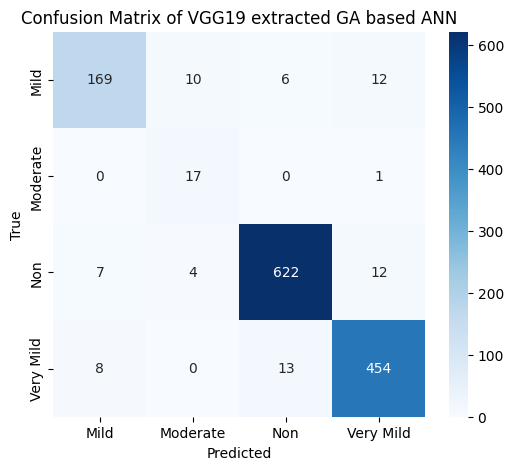

In [17]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Mild", "Moderate", "Non", "Very Mild"], yticklabels=["Mild", "Moderate", "Non", "Very Mild"])
plt.title("Confusion Matrix of VGG19 extracted GA based ANN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

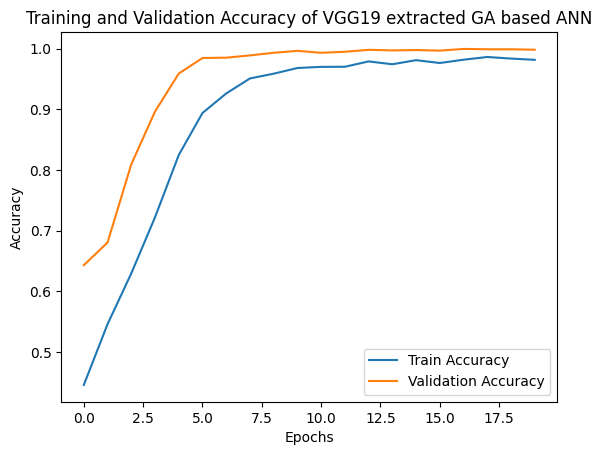

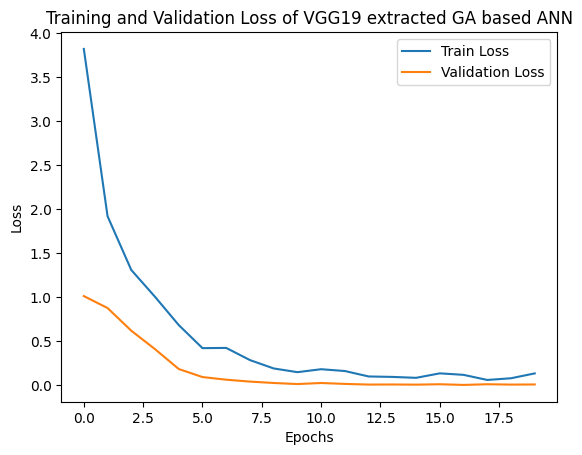

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy of VGG19 extracted GA based ANN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss of VGG19 extracted GA based ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
model.save("best_ann.h5")

/Users/saikarthik/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
